<a href="https://colab.research.google.com/github/RiyaBhurse/GradientDesent_Pickle_Joblib/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

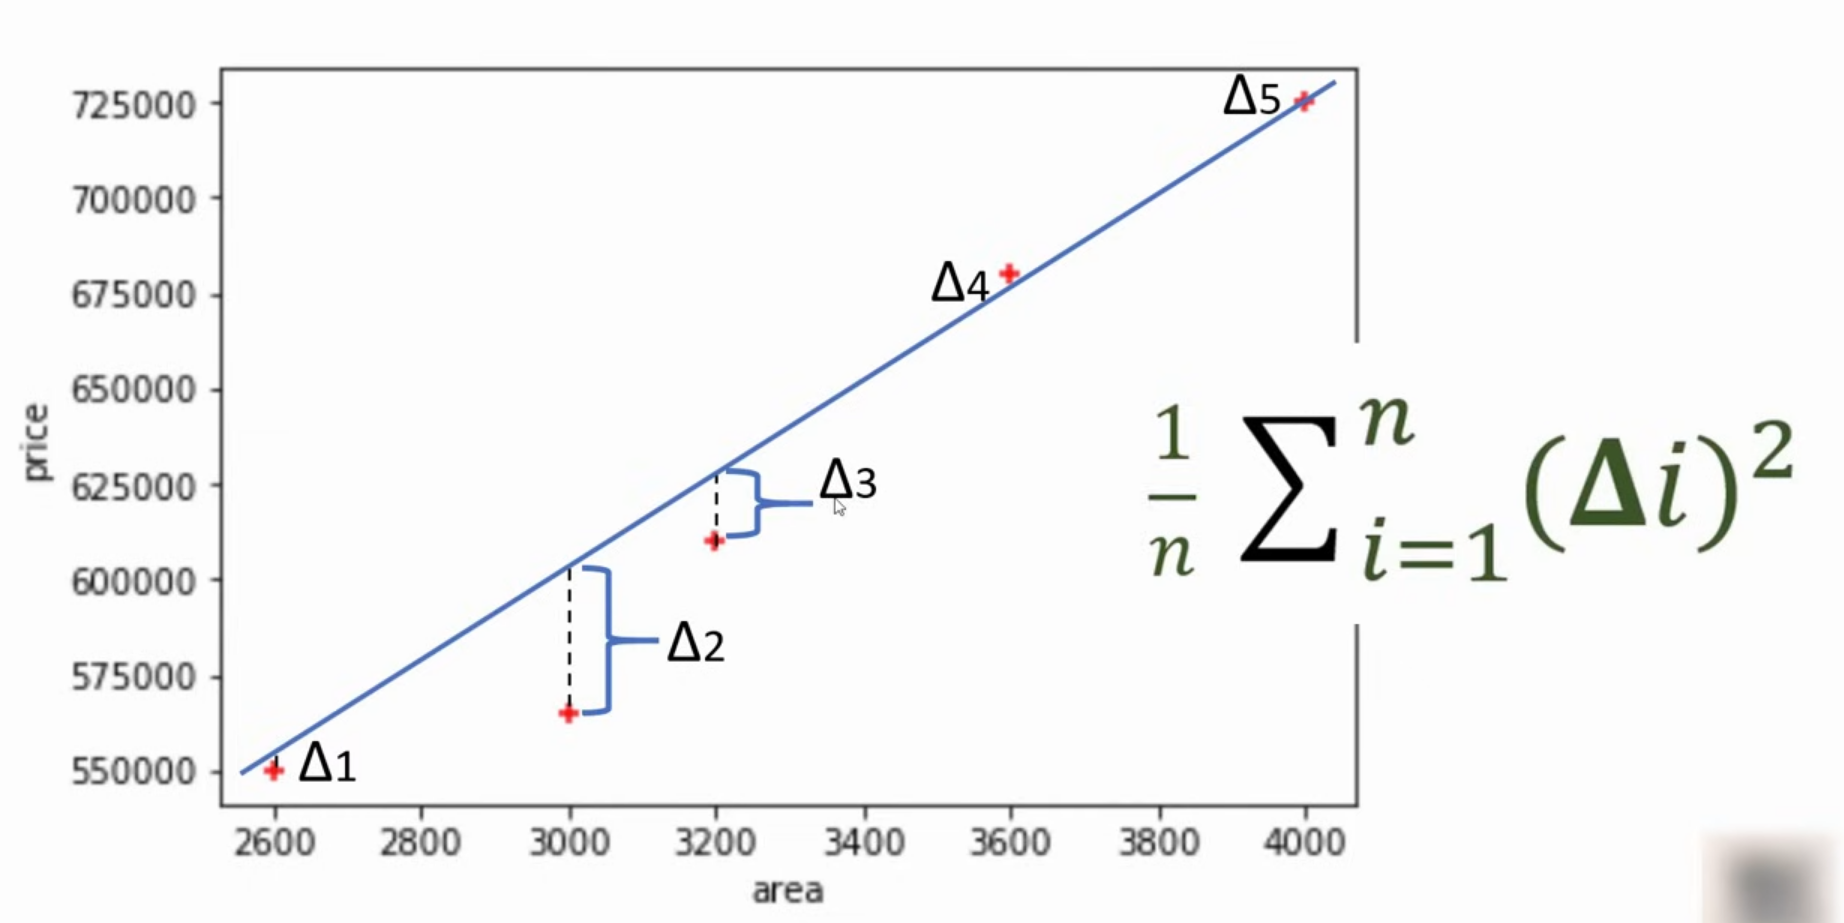

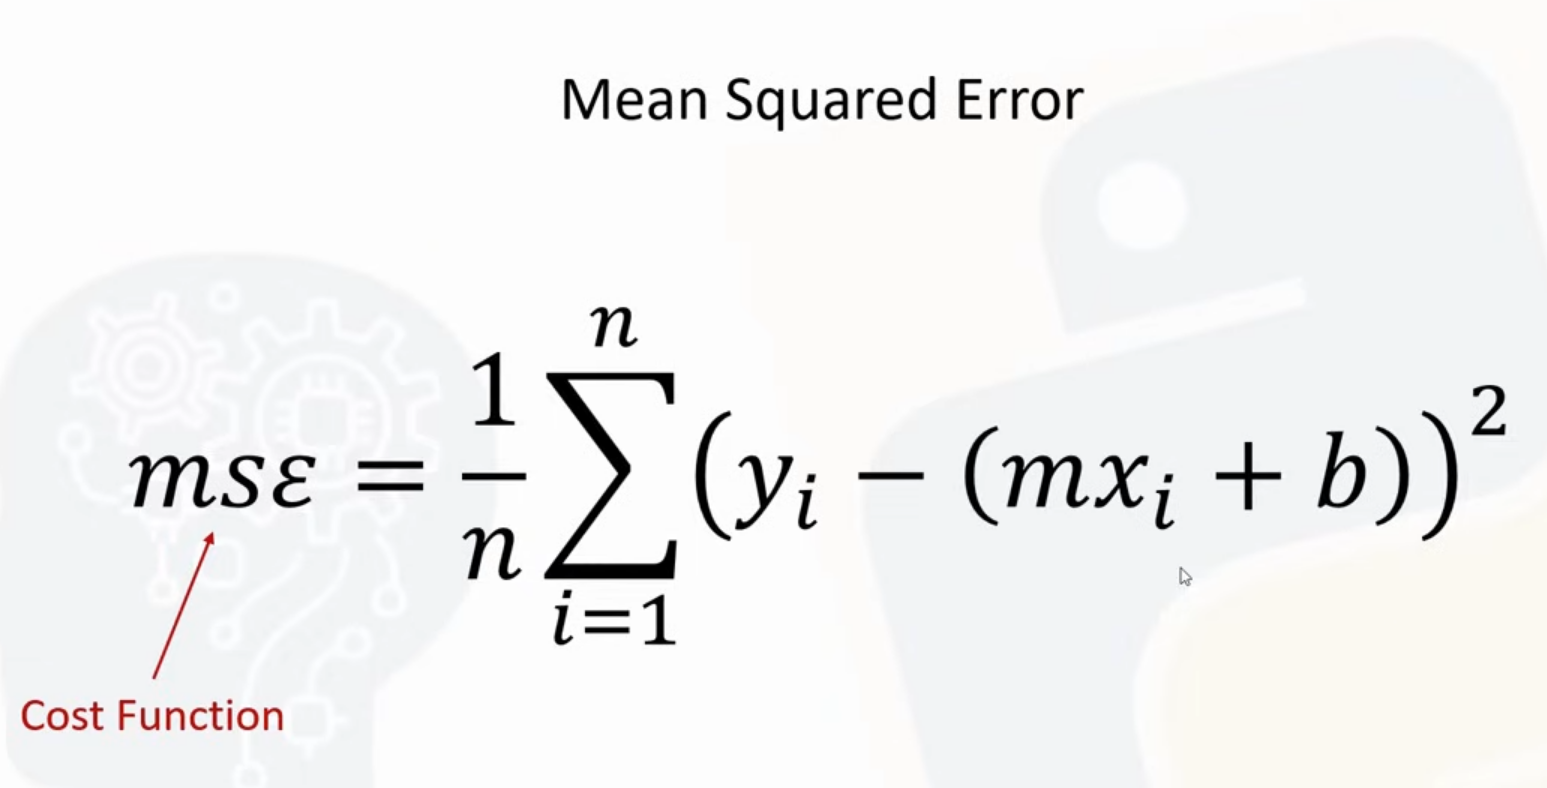

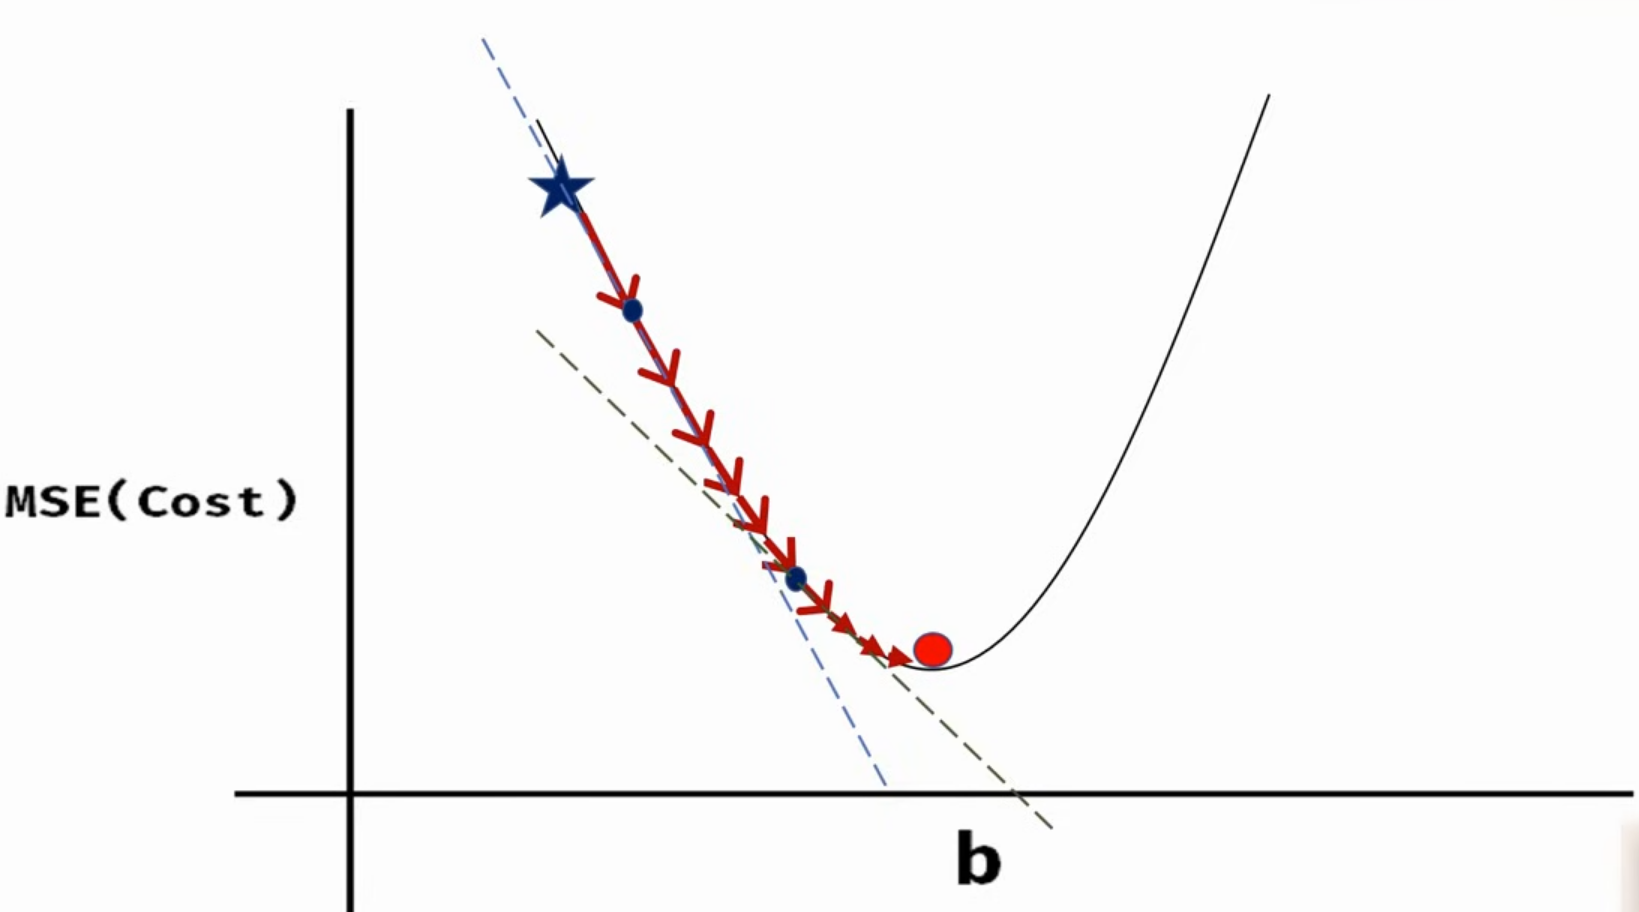

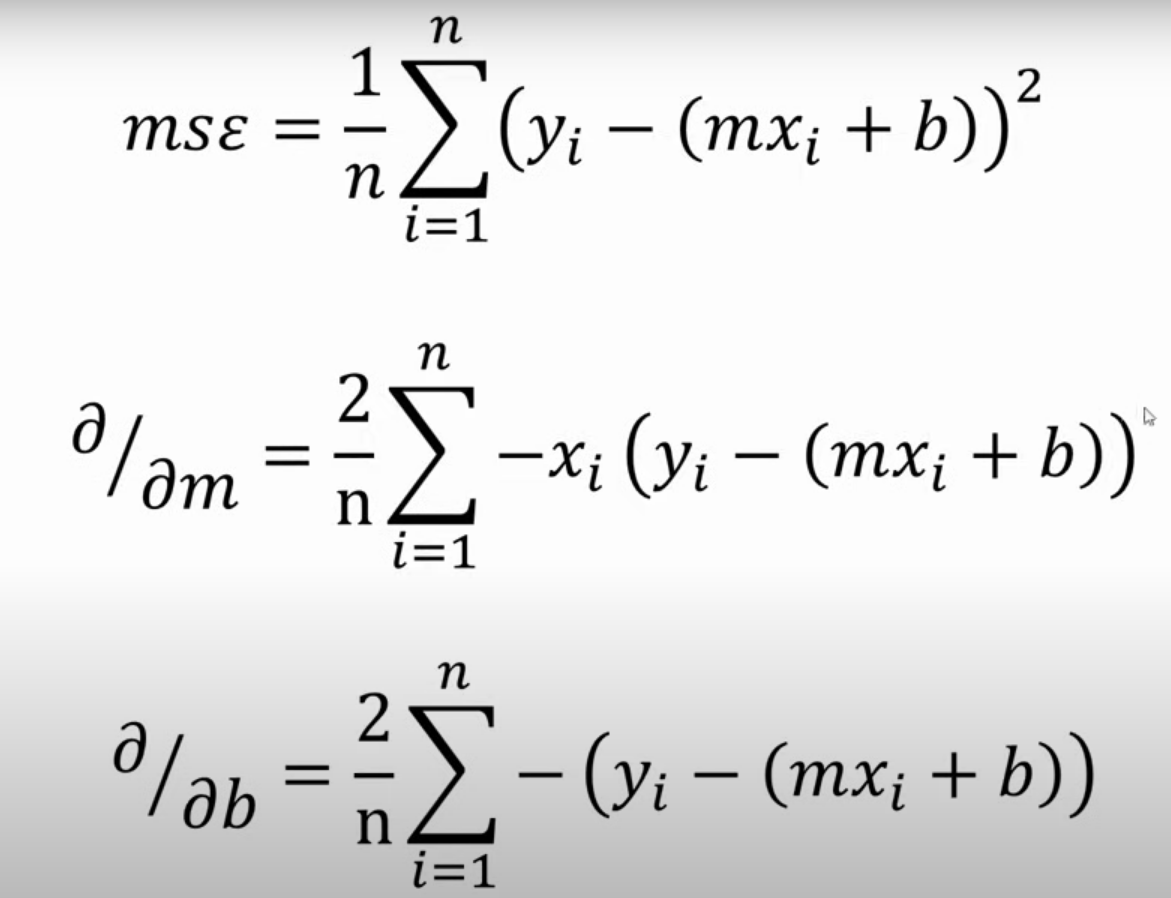

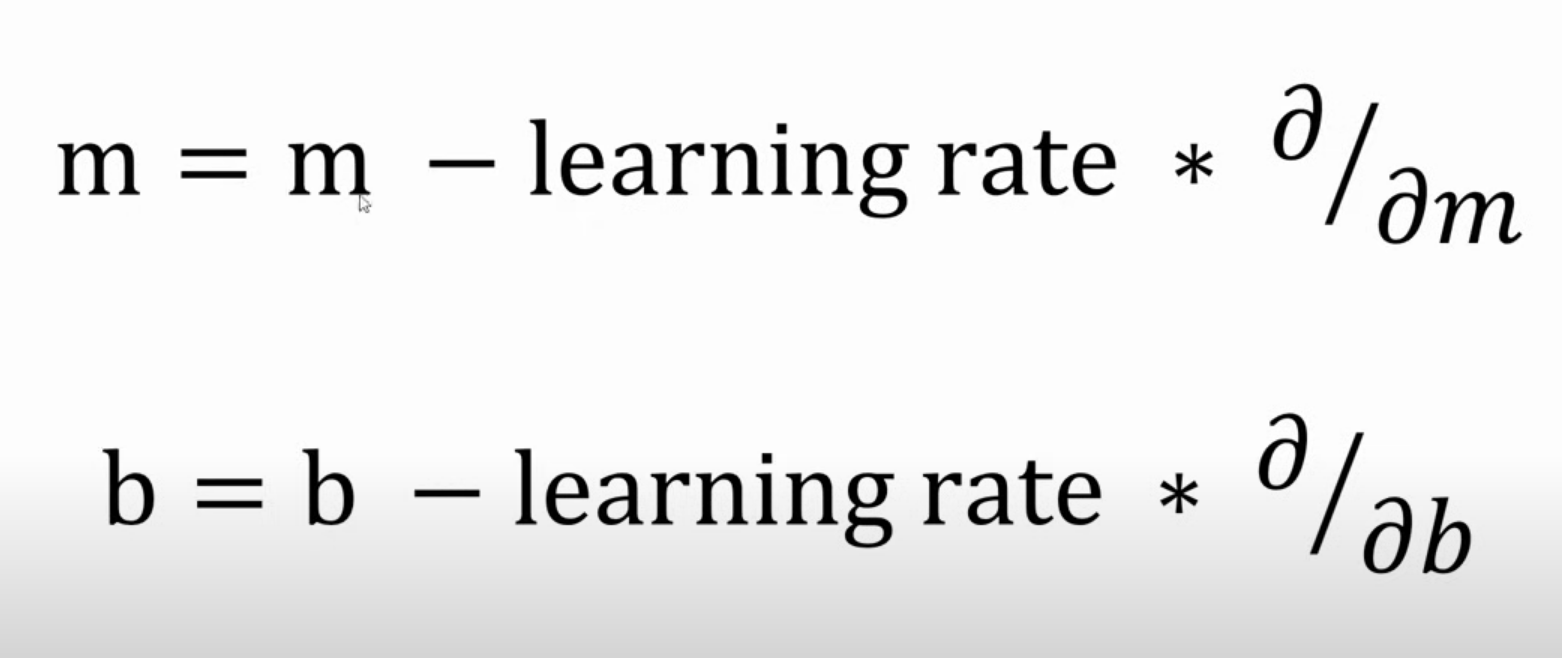

We will have to see the changes in MSE with respect to weights

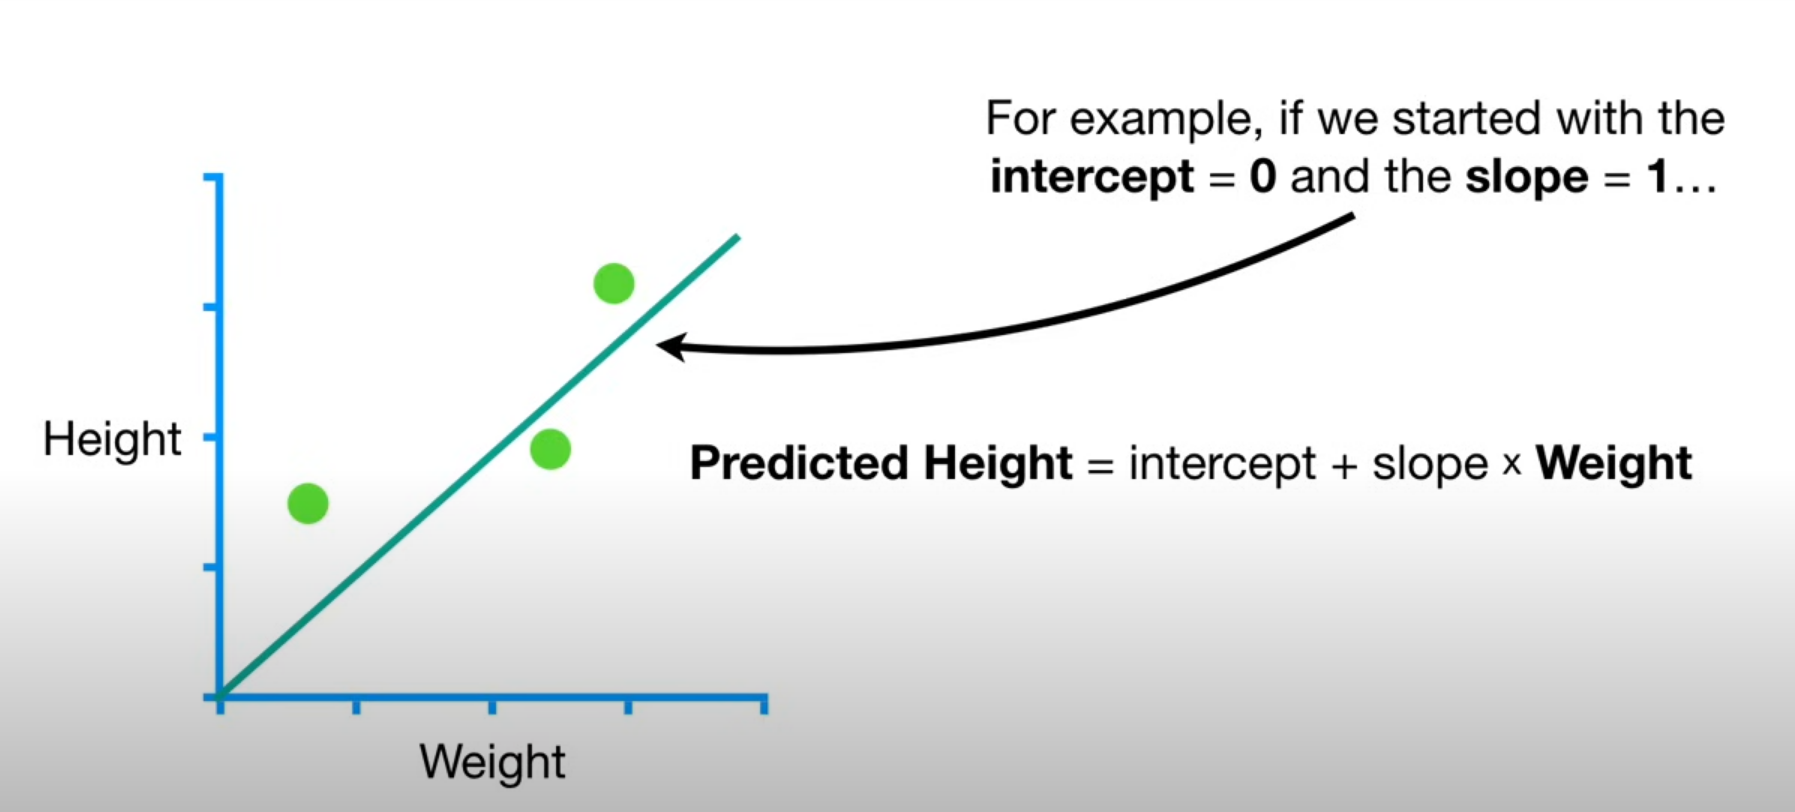

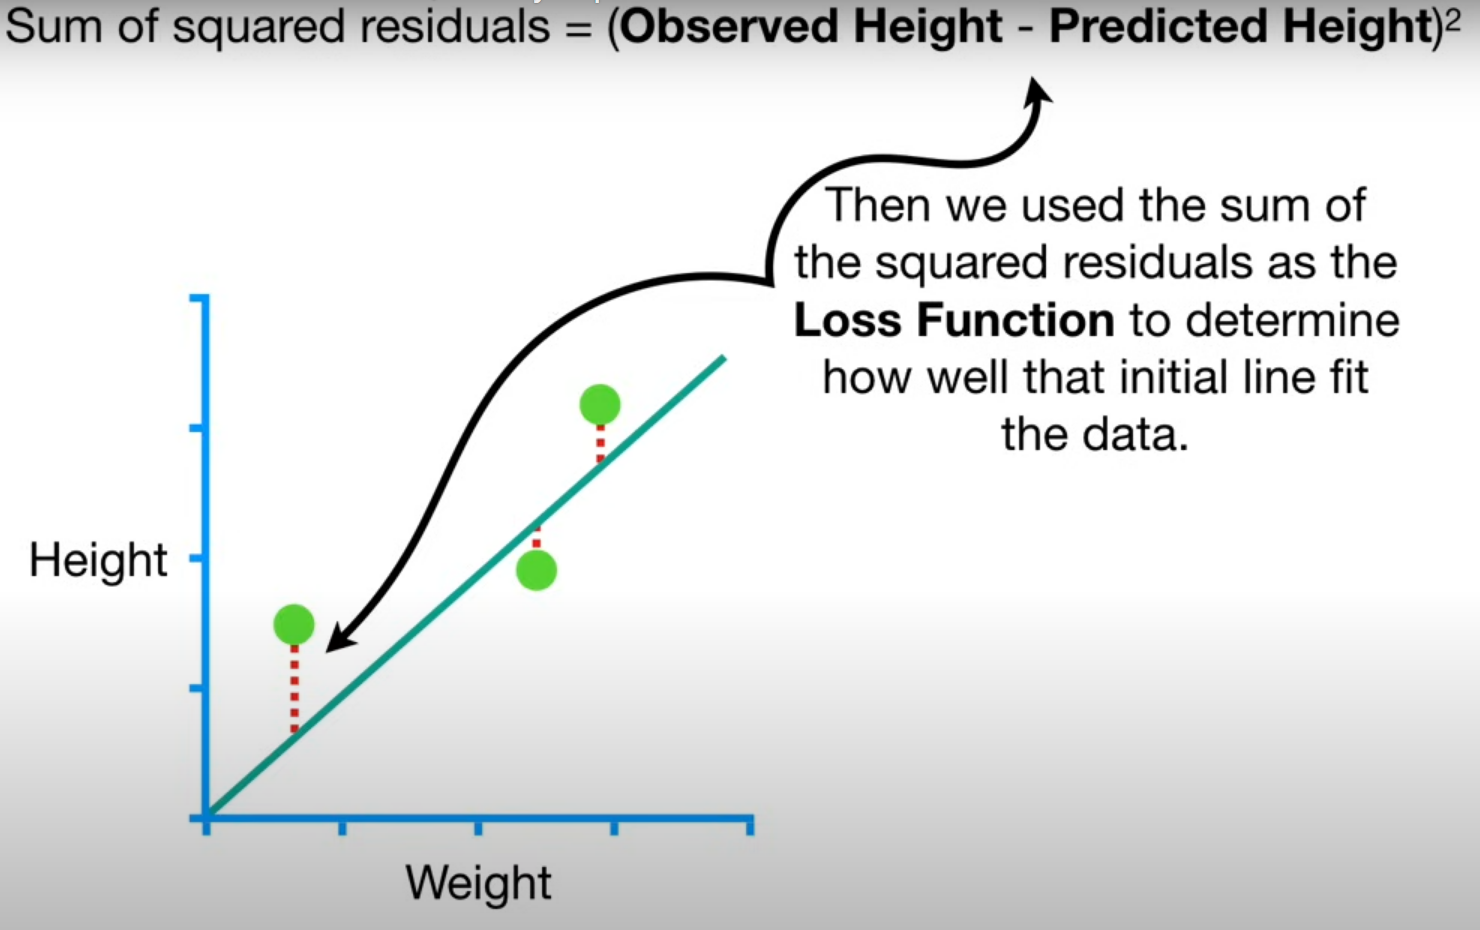

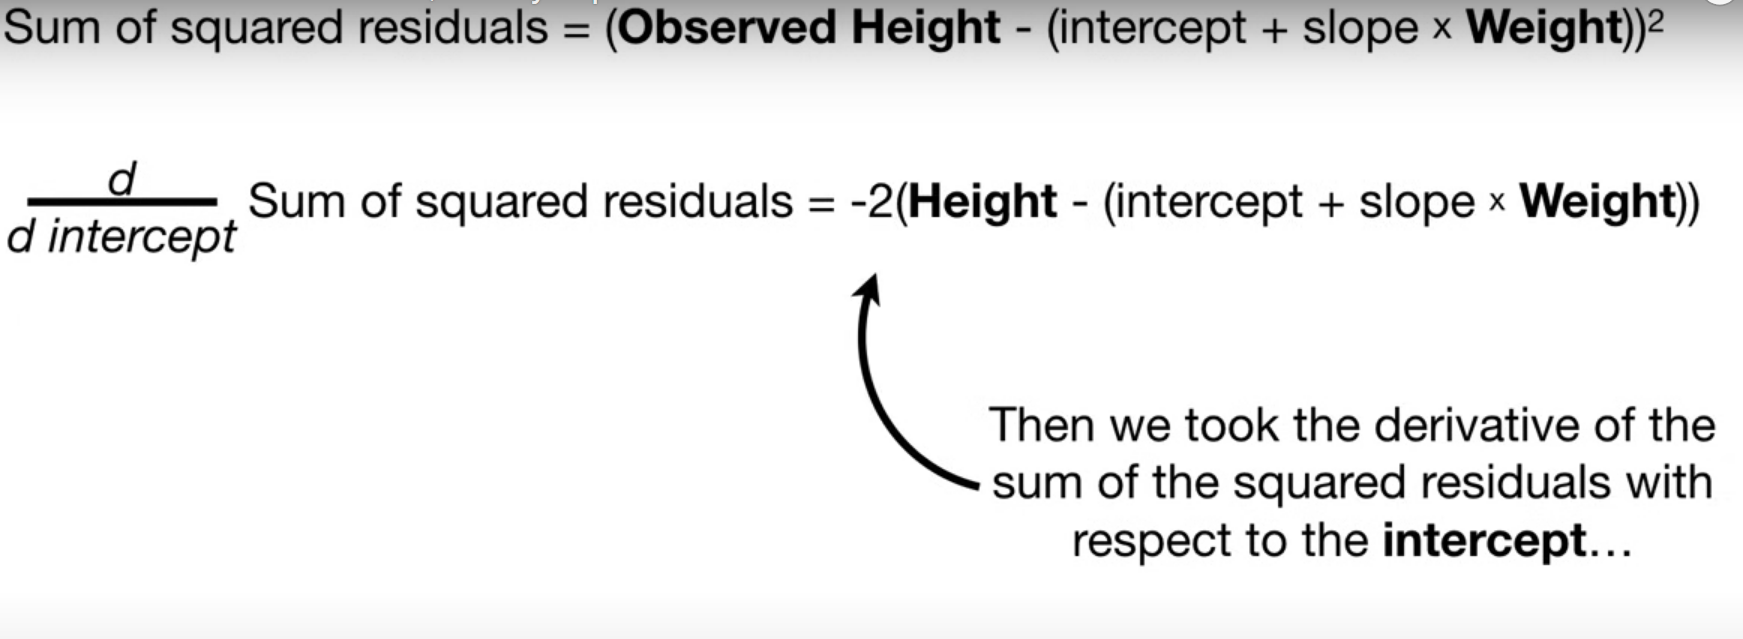

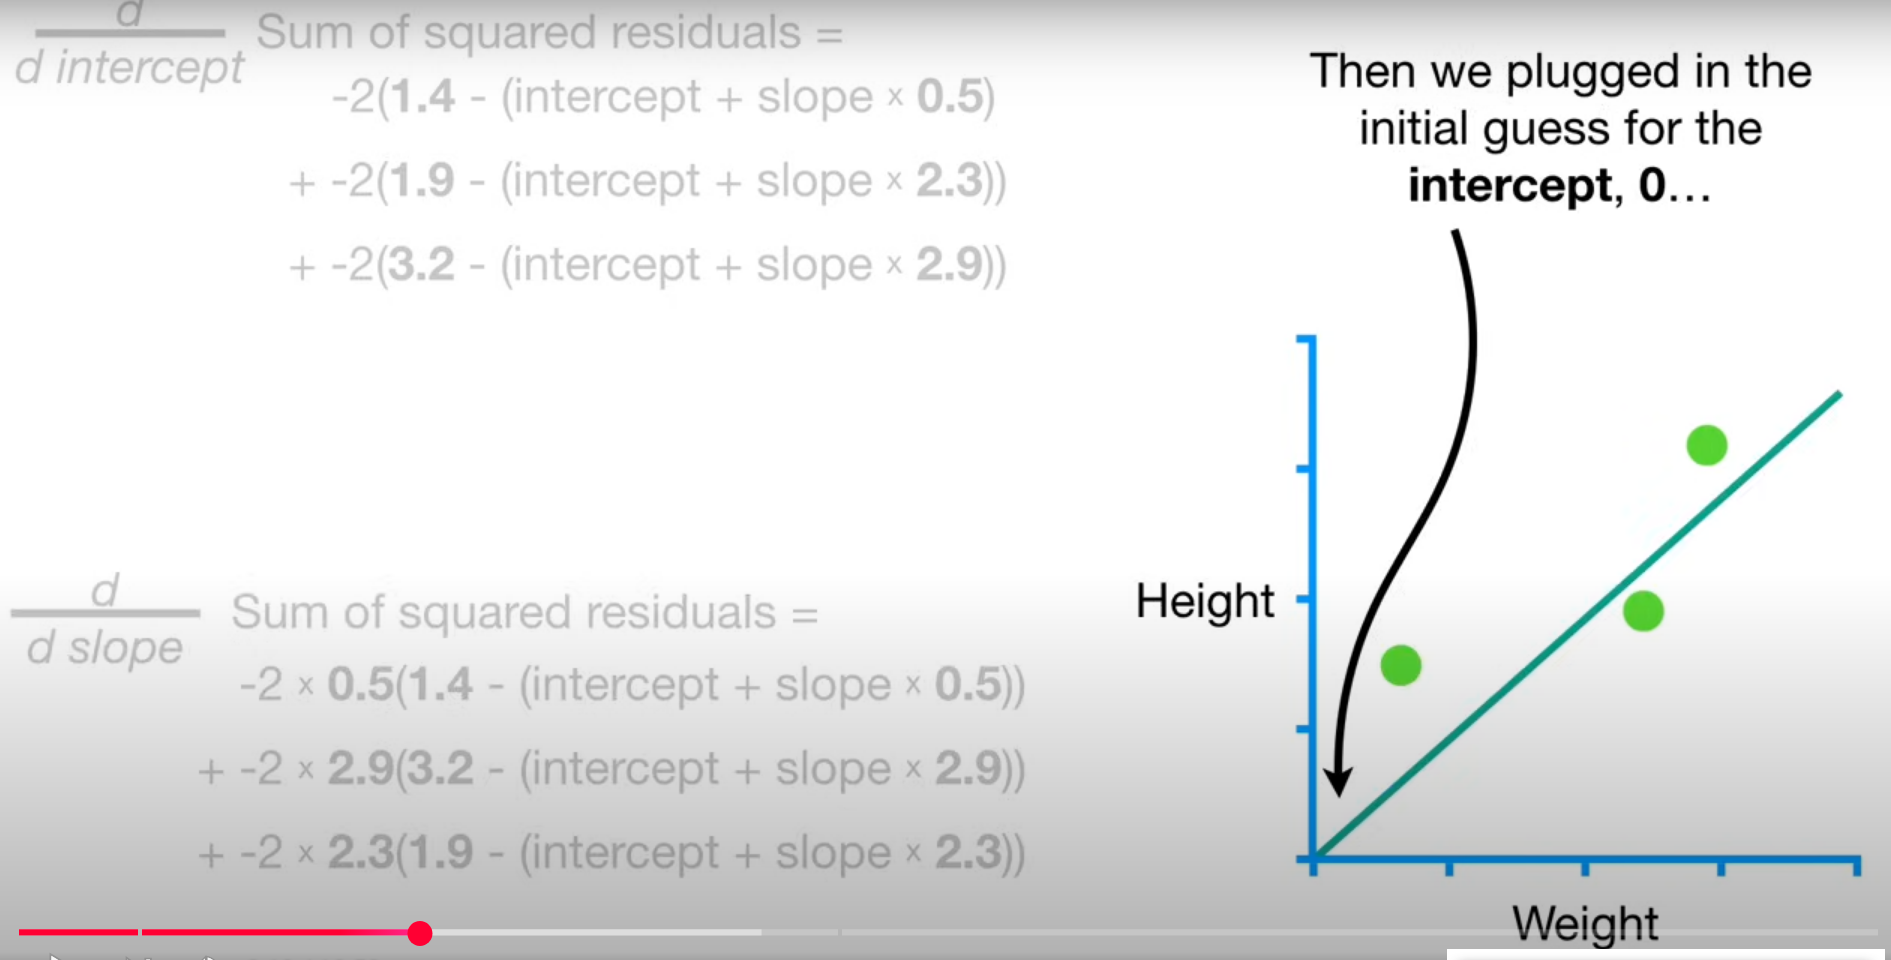

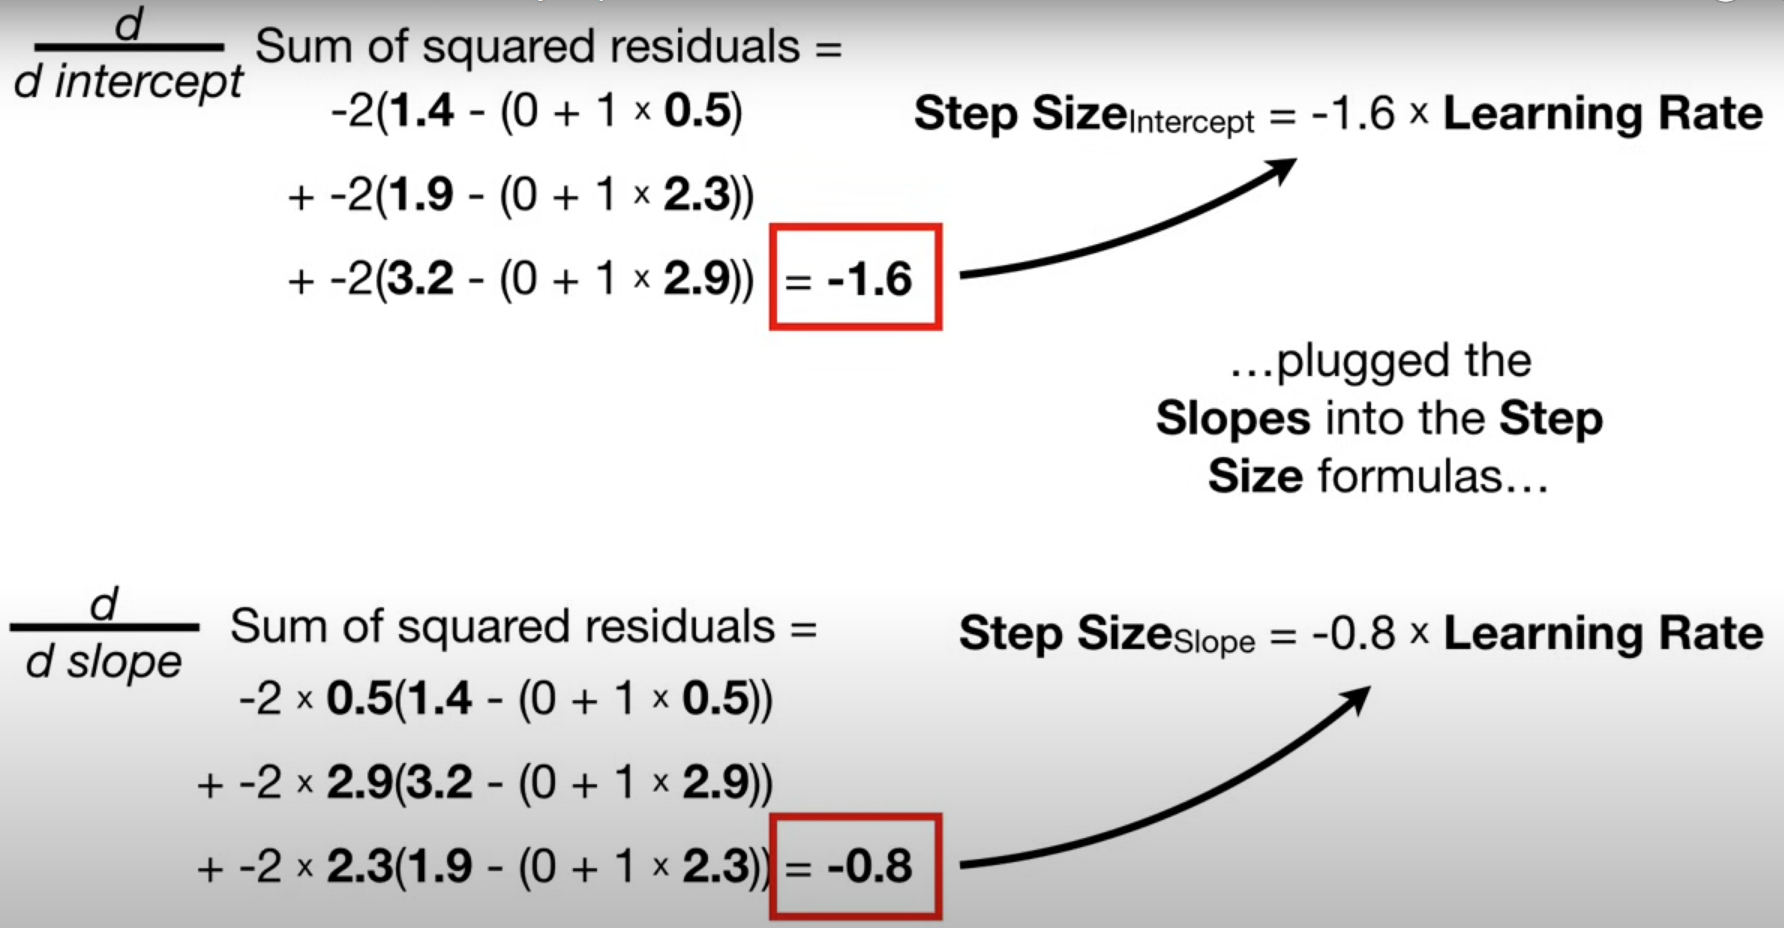

If We Had 23000 genes and 1M smaples then ? This would talk a lot of time. because every d(ssr)/d(gene1), d(ssr)/d(gene2) .... d(ssr)/d(gene23000) also in each step there would be 1M loss sums for each data point


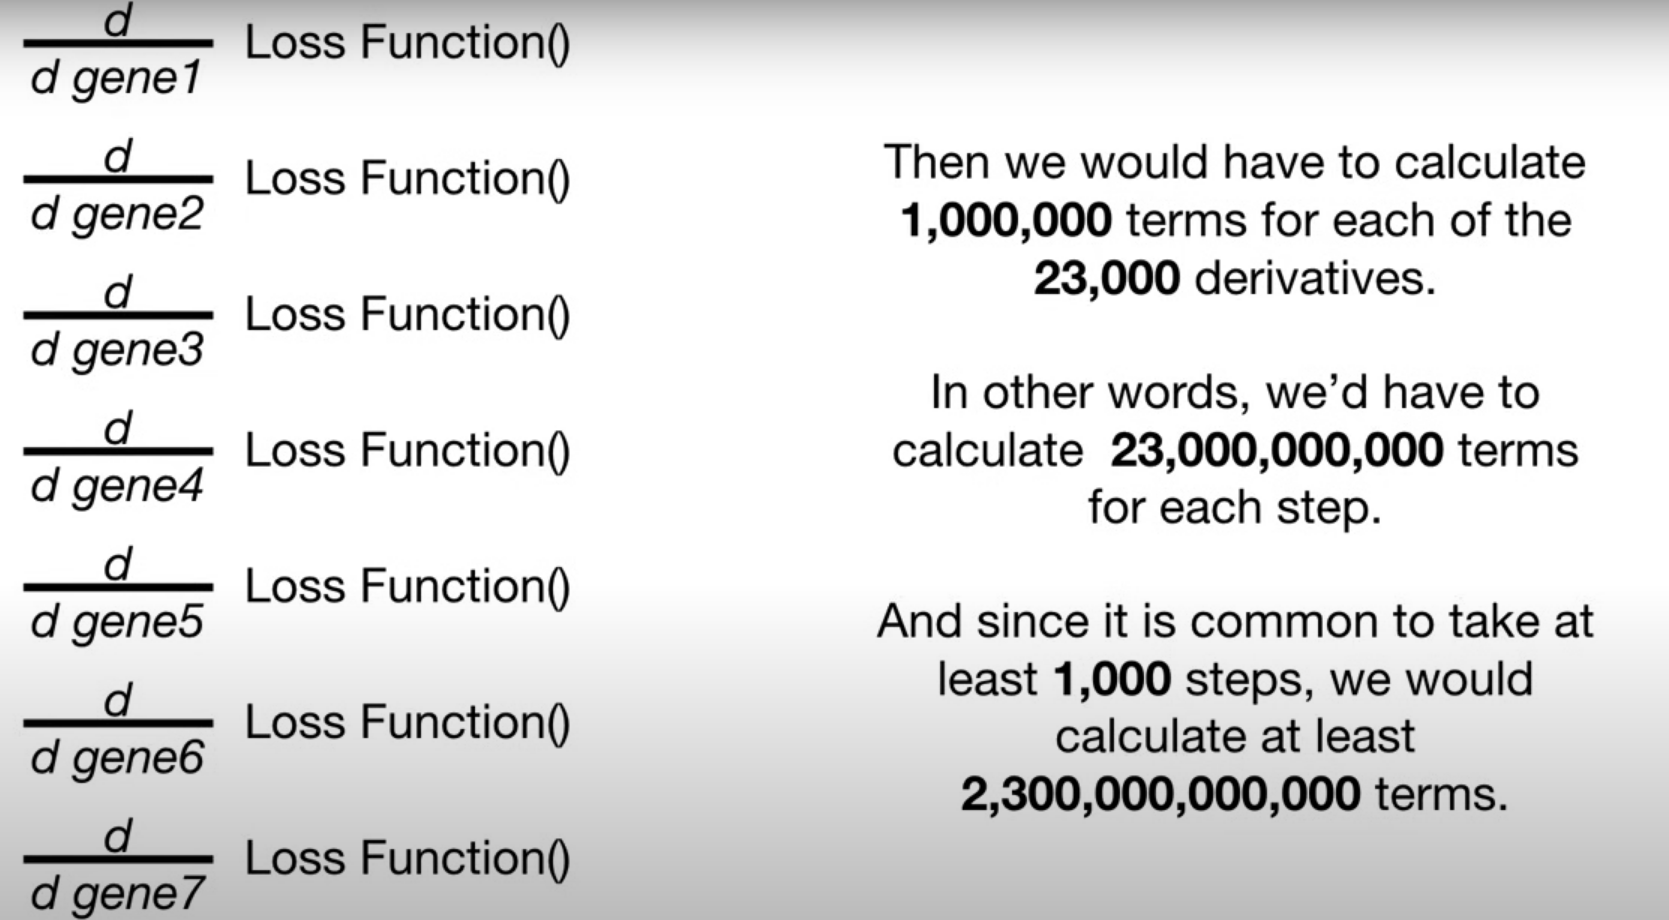

In [35]:
import numpy as np
import math

In [36]:
def gradient_desent(x,y):
  m_curr = b_curr = 0
  iterations = 1000
  n = len(x)
  learning_rate = 0.0001
  prev_cost = float('inf')
  for i in range(iterations):
    y_predicted = m_curr * x + b_curr
    cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
    if math.isclose(prev_cost, cost, rel_tol=1e-6):
      print(f"Converged at iteration {i}, cost: {cost}")
      break
    prev_cost = cost
    md = -(2/n) * sum(x * (y - y_predicted))
    bd = -(2/n) * sum(y - y_predicted)
    m_curr = m_curr - learning_rate * md
    b_curr = b_curr - learning_rate * bd
    print("m {}, b {}, iteration {}, cost {}".format(m_curr,b_curr,i, cost))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_desent(x,y)

m 0.006200000000000001, b 0.0018000000000000002, iteration 0, cost 89.0
m 0.012385280000000002, b 0.00359592, iteration 1, cost 88.58369304
m 0.018555874832000004, b 0.005387769648, iteration 2, cost 88.16935357626447
m 0.024711819245580805, b 0.0071755585691712, iteration 3, cost 87.75697230888764
m 0.030853147908099024, b 0.008959296365910018, iteration 4, cost 87.34653998192246
m 0.03697989540488166, b 0.010738992617891976, iteration 5, cost 86.93804738317266
m 0.04309209623942019, b 0.012514656882125469, iteration 6, cost 86.53148534398603
m 0.04918978483356419, b 0.014286298693005392, iteration 7, cost 86.12684473904856
m 0.055272995527714544, b 0.016053927562366652, iteration 8, cost 85.72411648617962
m 0.06134176258101615, b 0.01781755297953755, iteration 9, cost 85.32329154612809
m 0.0673961201715502, b 0.01957718441139303, iteration 10, cost 84.92436092236937
m 0.07343610239652595, b 0.021332831302407824, iteration 11, cost 84.52731566090353
m 0.07946174327247216, b 0.02308450

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [23]:
df = pd.read_csv('test_scores.csv')

In [18]:
df

name  math  cs
0   david    92  98
1   laura    56  68
2  sanjay    88  81
3     wei    70  80
4    jeff    80  83
5   aamir    49  52
6  venkat    65  66
7   virat    35  30
8  arthur    66  68
9    paul    67  73

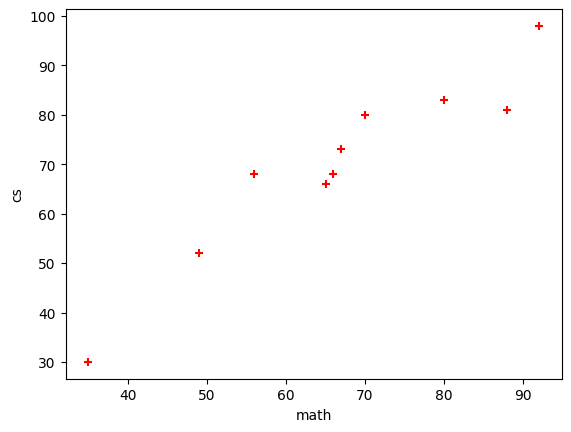

In [37]:
plt.xlabel('math')
plt.ylabel('cs')
plt.scatter(df.math,df.cs,color='red',marker='+')

In [38]:
gradient_desent(df.math,df.cs)

m 0.9891800000000002, b 0.013980000000000001, iteration 0, cost 5199.1
m 1.0416176032, b 0.0147417592, iteration 1, cost 46.3330473650399
m 1.0443971065873279, b 0.014802799669408, iteration 2, cost 31.852649863558305
m 1.0445441606668626, b 0.014826693765467417, iteration 3, cost 31.811952059367805
m 1.0445516647187705, b 0.014848618440205038, iteration 4, cost 31.811832943358482
Converged at iteration 5, cost: 31.81182786237329


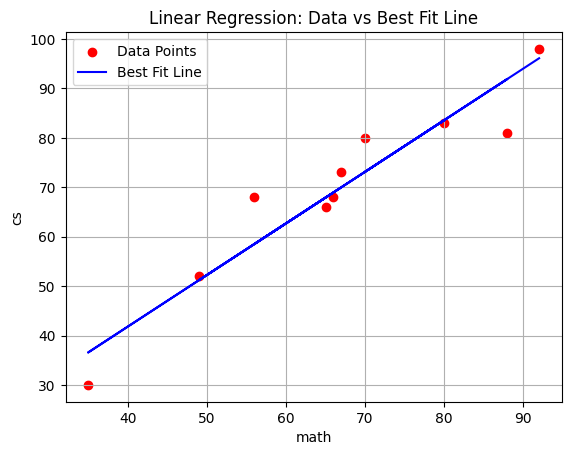

In [40]:
m = 1.0445516647187705
b = 0.014848618440205038
x = df.math
y = df.cs
plt.scatter(x, y, color='red', label='Data Points')
y_predicted = m * x + b
plt.plot(x, y_predicted, color='blue', label='Best Fit Line')  # learned line
plt.xlabel("math")
plt.ylabel("cs")
plt.title("Linear Regression: Data vs Best Fit Line")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
reg = linear_model.LinearRegression()
reg.fit(df[['math']],df.cs)

LinearRegression()

In [43]:
import pickle
with open('model_pickle','wb') as f:
  pickle.dump(reg,f)

In [44]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [46]:
mp.predict([[60]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62.97939358])

In [51]:
import sklearn
sklearn.__version__

'1.6.1'

In [53]:
import joblib
joblib.dump(reg,'model_joblib')


['model_joblib']

In [54]:
mj = joblib.load('model_joblib')

In [55]:
mj.predict([[78]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([81.29864586])